Let's try to move a simple model for hillslope (linear) diffusion into the framework. We will start with the following very simple explicit, finite difference model where the equation:
$$\frac{\partial z}{\partial t} = K_d\frac{\partial^2 z}{\partial x^2}$$
with the following boundary conditions:
$$z(0)=0$$ and $$\frac{\partial z}{\partial x}(L)=0$$
and initial condition:
$$z(t=0)=0$$
is solved by discretizing the space between $0$ and $L$ into $n_x$ equal increments of size $\Delta x = L/(nx-1)$ and the time between $0$ and $t_f$ is discretized into time steps of length $\Delta t$ to yield the following algorithm:
$$z_i(t+\Delta t) = z_i(t) + \frac{K_d\Delta t}{\Delta x^2}\Bigl(z_{i+1}(t)-2z_i(t)+z_{i-1}(t)\Bigr)$$

We will use the following values for the model parameters: $K_d=0.01$ m$^2$/yr, $n_1=21$, $L=100$ m, and $\Delta t=1000$ years. We will compute the solution at $t_f=500,000$ years.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

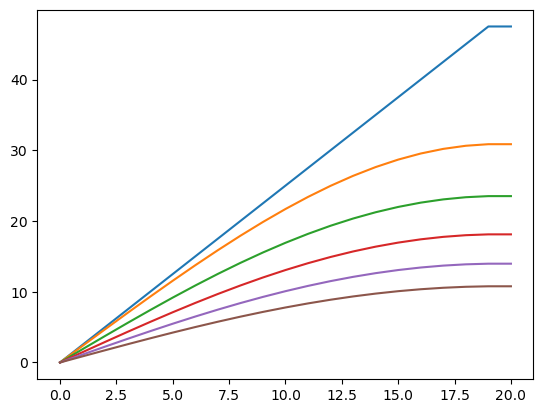

In [3]:
kd = 0.01
nx = 21
z = np.linspace(0,50,nx)
L = 100
dx = L/(nx - 1)
dt = 1000
nstep = 501

for istep in range(nstep):
    z[1:-1] = z[1:-1] + kd*dt/dx**2*(z[:-2] - 2*z[1:-1] + z[2:])
    z[-1] = z[-2]
    if istep%100==0: plt.plot(z)
    


Let's import this model into the xarray simlab framework

In [4]:
import xsimlab as xs
import xarray as xr


For this we create a simple process that only has internal variables that correspond to the model parameters and can be specified as input parameters

We now include some basic information by associating values/fields to the variables, like a short description or units

Let's now introduce a second process that will prepare a initial topography made of a planar surface of known dip discretized using $n_x$ points